In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
y = df['sales'] #target variable 
X = df.drop('sales',axis=1) # features

In [4]:
polynomial_converter0 = PolynomialFeatures(degree=2,include_bias=False) # Generate polynomial and interaction features.
polynomial_converter0.fit(X) # Compute number of output features.
poly_features0 = polynomial_converter0.transform(X) # Transform data to polynomial features.

In [5]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [6]:
poly_features0[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False) 
poly_features = polynomial_converter.fit_transform(X) # Fit to data, then transform it.
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [8]:
poly_features.shape # TV, radio, newspaper, TV*radio, TV*newspaper, radio*newspaper, TV^2, radio^2, newspaper^2 // maybe a different order

(200, 9)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

In [11]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [12]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

<AxesSubplot:xlabel='sales', ylabel='sales'>

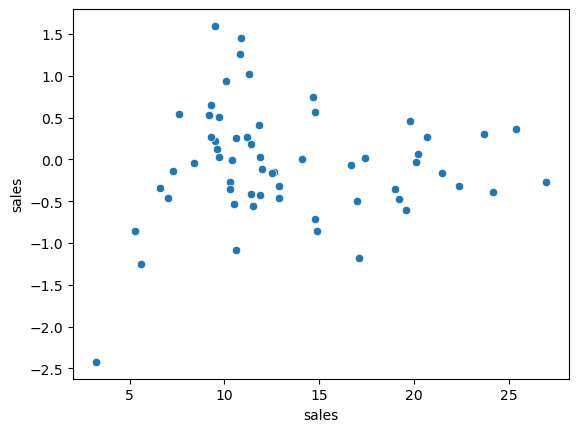

In [55]:
test_res = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_res)

In [56]:
MAE # L.r. MAE = 1.213

0.4896798044803558

In [58]:
RMSE #L.r. RMSE = 1.516

0.664643175726899